<a href="https://colab.research.google.com/github/diegopenia/Colorimetria/blob/main/Polinizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerías y rutas

In [10]:
import pandas as pd
import os

#Conectar con google drive
from google.colab import drive

drive.mount('/content/drive')

# Rutas
csv_path = '/content/drive/MyDrive/Polinizadores/DataSet.csv'
images_folder = '/content/drive/MyDrive/Polinizadores/plantas_agroparque'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Conectar Imágenes con Data Frame

In [11]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv(csv_path, delimiter=';', encoding='utf-8')

# Obtener los nombres de los archivos de imagen
image_files = os.listdir(images_folder)

# Crear un diccionario para mapear IDs a nombres de archivos
image_dict = {}
for file in image_files:
    # Extraer el ID del nombre del archivo
    file_id = int(file.split('.')[0].split()[0])
    image_dict[file_id] = file

# Crear una nueva columna 'Nombre_Archivo' con los nombres de archivos basados en el ID
df['Nombre_Archivo'] = df['ID'].map(image_dict)

In [12]:
#Vista del Data Frame
df

,ID,Nombre_Científico,Nombre_Común,Nombre_Archivo
0,1,Ciruelillo,Koanophyllon albicaule,1. Koanophyllon albicaule.jpeg
1,2,Zinnia,Zinnia elegans,2. Zinnia elegans.jpeg
2,3,Sangre de Drago,Croton lechleri,3. Croton lechleri.jpeg
3,4,"Chitatoo, Capulín",Muntingia calabura,4. Muntingia calabura.jpg
4,5,"Mermelada, Cinco negritos, Bandera española",Lantana camara,5. Lantana camara.jpeg
5,6,"Corta lengua, Yerce",Casearia commersoniana,6.Casearia commersoniana .jpeg
6,7,Uchuva,Physalis peruviana,7. Physalis peruviana.jpg
7,8,Cariaquito Morado,Lantana trifolia,8 Lantana trifolia.jpg
8,9,Tomatillo,Physalis angulata,9 Physalis angulata.jpg
9,10,"Chile dulce, Pimiento dulce, Ají, Locote, Pime...",Capsicum annuum,10. Capsicum annuum .jpeg


In [ ]:
# Guardar el DataFrame actualizado en un nuevo archivo CSV
updated_csv_path = '/content/drive/MyDrive/Polinizadores/DataSet_updated.csv'
df.to_csv(updated_csv_path, index=False)

print(f"Proceso completado. El DataFrame actualizado se ha guardado en: {updated_csv_path}")

### Extrae colores y actualiza Data Frame

In [24]:
from PIL import Image
import numpy as np
import cv2
from sklearn.cluster import KMeans
import os

# Función para extraer los colores dominantes y sus porcentajes
def extract_colors(image_path, num_colors=10):
    image = Image.open(image_path)
    image = image.resize((100, 100))  # Redimensionar para acelerar el procesamiento
    image_np = np.array(image)
    image_np = image_np.reshape((image_np.shape[0] * image_np.shape[1], 3))

    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(image_np)

    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    label_counts = np.bincount(labels)
    total_count = labels.shape[0]

    rgb_colors = [tuple(color) for color in colors]
    color_percentages = [f"{(count / total_count) * 100:.2f}%" for count in label_counts]

    return rgb_colors, color_percentages

# Crear nuevas columnas para almacenar los colores RGB y sus porcentajes
for i in range(1, 11):
    df[f'RGB_{i}'] = None
    df[f'RGB_{i}_percent'] = None

# Extraer colores dominantes y sus porcentajes para cada imagen y añadirlos a las columnas correspondientes
for idx, row in df.iterrows():
    image_path = os.path.join(images_folder, row['Nombre_Archivo'])
    if os.path.exists(image_path):
        rgb_colors, color_percentages = extract_colors(image_path)
        for i in range(10):
            df.at[idx, f'RGB_{i+1}'] = (rgb_colors[i])
            df.at[idx, f'RGB_{i+1}_percent'] = color_percentages[i]

In [27]:
# Guardar el DataFrame actualizado en un nuevo archivo CSV
updated_csv_path = '/content/drive/MyDrive/Polinizadores/Set_RGB.csv'
df.to_csv(updated_csv_path, index=False)

print(f"Proceso completado. El DataFrame actualizado con los colores RGB y sus porcentajes se ha guardado en: {updated_csv_path}")


Proceso completado. El DataFrame actualizado con los colores RGB y sus porcentajes se ha guardado en: /content/drive/MyDrive/Polinizadores/Set_RGB.csv


In [28]:
df

,ID,Nombre_Científico,Nombre_Común,Nombre_Archivo,RGB_1,RGB_1_percent,RGB_2,RGB_2_percent,RGB_3,RGB_3_percent,...,RGB_6,RGB_6_percent,RGB_7,RGB_7_percent,RGB_8,RGB_8_percent,RGB_9,RGB_9_percent,RGB_10,RGB_10_percent
0,1,Ciruelillo,Koanophyllon albicaule,1. Koanophyllon albicaule.jpeg,"(32, 51, 18)",21.24%,"(130, 154, 80)",6.87%,"(221, 220, 194)",5.97%,...,"(109, 146, 23)",8.84%,"(75, 116, 17)",13.72%,"(15, 28, 7)",12.37%,"(51, 75, 30)",12.31%,"(157, 169, 124)",6.19%
1,2,Zinnia,Zinnia elegans,2. Zinnia elegans.jpeg,"(225, 152, 23)",2.39%,"(131, 112, 80)",8.30%,"(104, 144, 78)",17.87%,...,"(216, 72, 31)",7.17%,"(155, 37, 15)",2.75%,"(250, 95, 31)",16.71%,"(207, 187, 160)",4.39%,"(151, 137, 106)",15.51%
2,3,Sangre de Drago,Croton lechleri,3. Croton lechleri.jpeg,"(2, 8, 1)",12.76%,"(63, 94, 69)",17.23%,"(158, 159, 146)",3.43%,...,"(35, 56, 27)",13.02%,"(92, 96, 45)",5.88%,"(17, 34, 9)",10.32%,"(104, 113, 81)",9.09%,"(49, 76, 48)",15.76%
3,4,"Chitatoo, Capulín",Muntingia calabura,4. Muntingia calabura.jpg,"(218, 206, 120)",3.44%,"(79, 104, 7)",15.87%,"(141, 134, 106)",8.57%,...,"(190, 171, 45)",3.53%,"(96, 91, 67)",10.09%,"(237, 237, 229)",8.04%,"(187, 184, 168)",6.57%,"(21, 35, 6)",15.97%
4,5,"Mermelada, Cinco negritos, Bandera española",Lantana camara,5. Lantana camara.jpeg,"(221, 140, 64)",5.27%,"(90, 162, 121)",13.35%,"(51, 61, 56)",12.38%,...,"(133, 120, 90)",6.44%,"(109, 187, 163)",20.74%,"(246, 209, 45)",3.59%,"(75, 98, 84)",10.87%,"(157, 157, 159)",6.99%
5,6,"Corta lengua, Yerce",Casearia commersoniana,6.Casearia commersoniana .jpeg,"(58, 58, 37)",6.67%,"(210, 199, 178)",6.81%,"(129, 136, 116)",7.53%,...,"(226, 219, 211)",3.88%,"(159, 159, 129)",5.43%,"(124, 151, 46)",6.18%,"(75, 89, 61)",19.37%,"(104, 119, 102)",14.06%
6,7,Uchuva,Physalis peruviana,7. Physalis peruviana.jpg,"(25, 40, 6)",9.04%,"(128, 139, 94)",14.60%,"(70, 106, 11)",12.38%,...,"(178, 176, 90)",6.27%,"(94, 100, 54)",11.93%,"(149, 101, 56)",3.60%,"(153, 164, 146)",7.76%,"(97, 137, 12)",12.09%
7,8,Cariaquito Morado,Lantana trifolia,8 Lantana trifolia.jpg,"(86, 115, 54)",14.57%,"(146, 196, 102)",10.71%,"(41, 70, 19)",13.67%,...,"(17, 46, 5)",11.23%,"(64, 92, 36)",13.90%,"(123, 168, 84)",10.81%,"(183, 207, 134)",4.80%,"(107, 137, 72)",13.83%
8,9,Tomatillo,Physalis angulata,9 Physalis angulata.jpg,"(129, 157, 110)",7.67%,"(72, 97, 43)",12.36%,"(205, 205, 147)",5.15%,...,"(125, 145, 58)",8.58%,"(52, 74, 14)",8.24%,"(183, 184, 99)",4.85%,"(104, 137, 92)",24.73%,"(178, 152, 20)",3.15%
9,10,"Chile dulce, Pimiento dulce, Ají, Locote, Pime...",Capsicum annuum,10. Capsicum annuum .jpeg,"(227, 222, 221)",5.75%,"(131, 164, 138)",10.49%,"(70, 105, 13)",10.42%,...,"(164, 181, 150)",16.82%,"(159, 163, 129)",12.36%,"(205, 203, 189)",8.67%,"(130, 140, 110)",11.29%,"(82, 104, 48)",5.52%


### Paleta de colores

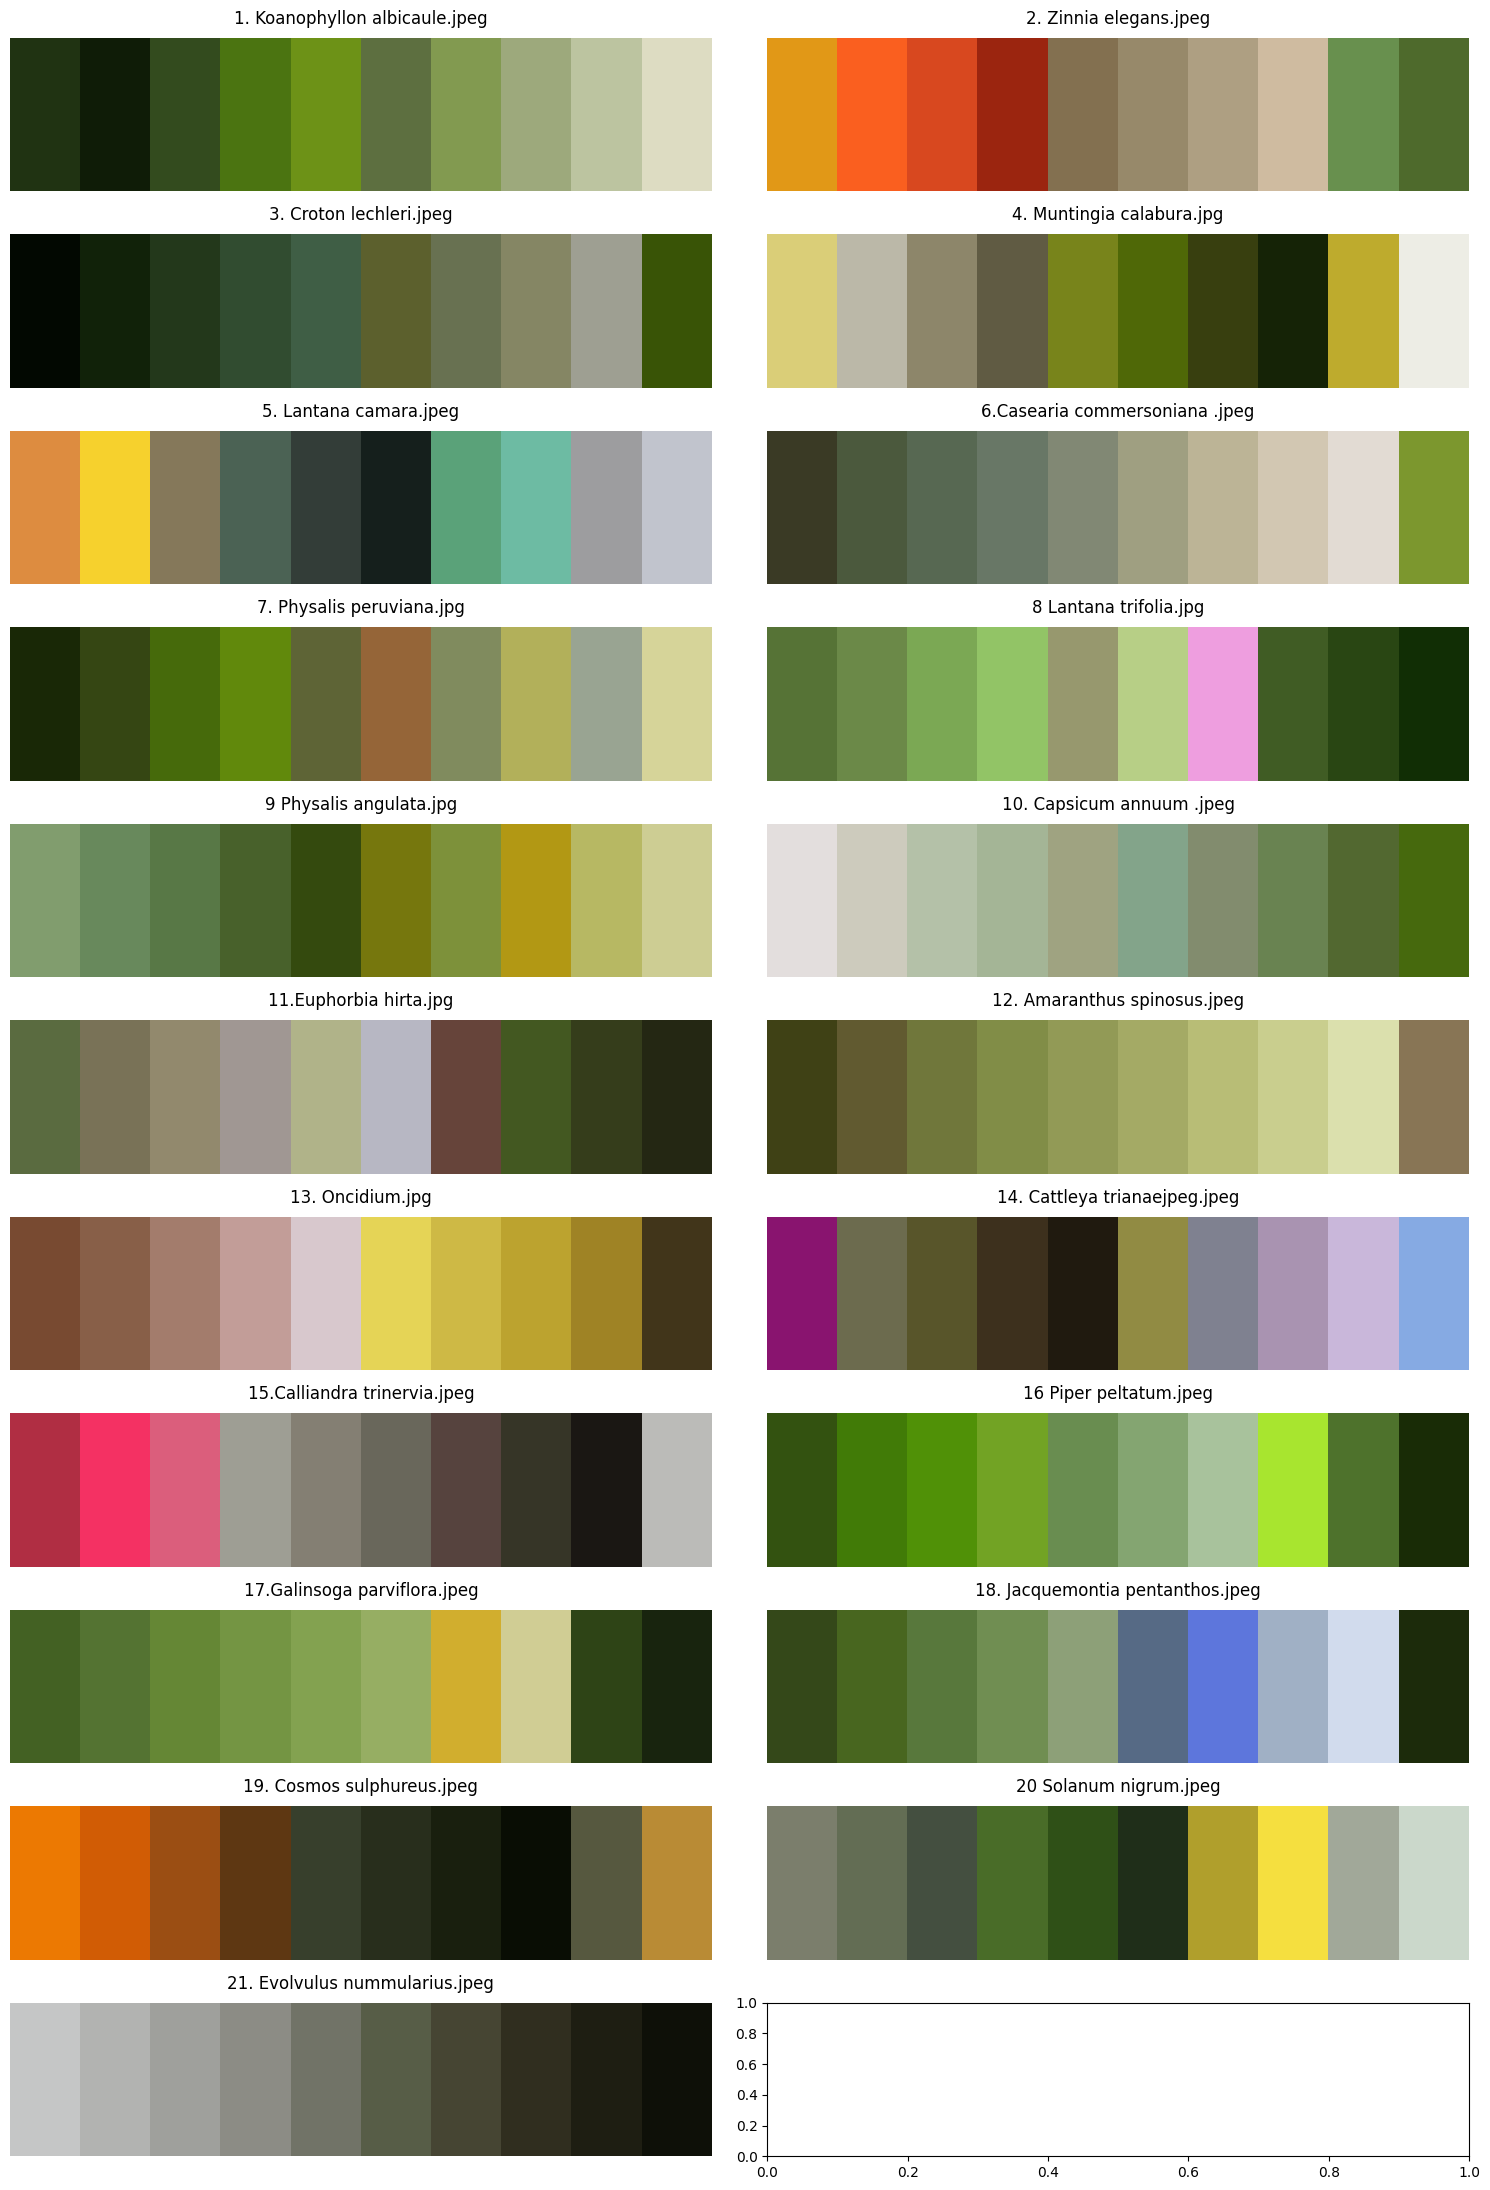

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import math

# Cargar el DataFrame desde el archivo CSV
csv_path = '/content/drive/MyDrive/Polinizadores/Set_RGB.csv'
df = pd.read_csv(csv_path)

# Función para calcular la proximidad de color usando la distancia euclidiana
def sort_colors_by_proximity(rgb_colors):
    sorted_colors = [rgb_colors[0]]
    for _ in range(1, len(rgb_colors)):
        last_color = sorted_colors[-1]
        remaining_colors = [color for color in rgb_colors if color not in sorted_colors]
        next_color = min(remaining_colors, key=lambda color: distance.euclidean(last_color, color))
        sorted_colors.append(next_color)
    return sorted_colors

# Función para crear paletas de colores con nombres de imágenes
def create_color_palettes_with_names(df):
    num_images = len(df)
    num_rows = math.ceil(num_images / 2)  # Calcular el número de filas necesarias
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 2))

    for idx, row in df.iterrows():
        rgb_colors = [eval(row[f'RGB_{i+1}']) for i in range(10)]
        sorted_rgb_colors = sort_colors_by_proximity(rgb_colors)
        image_name = row['Nombre_Archivo']  # Ajusta el nombre de la columna si es necesario

        row_idx = idx // 2
        col_idx = idx % 2
        ax = axes[row_idx, col_idx]
        ax.imshow([sorted_rgb_colors], aspect='auto')
        ax.axis('off')
        ax.set_title(image_name, fontsize=12, pad=10, loc='center')

    plt.tight_layout()
    plt.show()

# Ejecutar la función para crear las paletas de colores con nombres de imágenes
create_color_palettes_with_names(df)

### Gráfico de barras

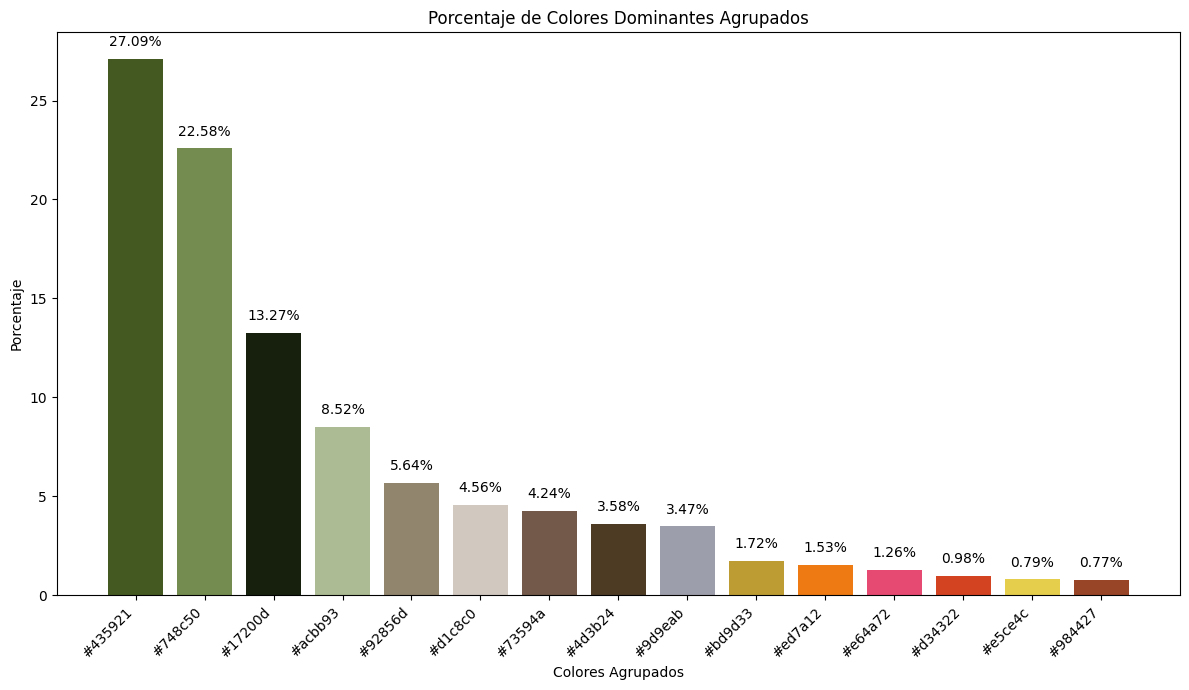

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar el DataFrame desde el archivo CSV
csv_path = '/content/drive/MyDrive/Polinizadores/DataSet_updated_with_rgb_colors_and_percentages.csv'
df = pd.read_csv(csv_path)

# Función para determinar si un color es verde
def is_green(color):
    r, g, b = color
    return g > r and g > b and g > 50  # Puedes ajustar el umbral de 50 según sea necesario

# Función para agrupar colores similares, agrupando los verdes en menos grupos
def group_similar_colors(colors, percentages, num_green_clusters=3, num_non_green_clusters=12):
    colors_np = np.array(colors)
    percentages_np = np.array(percentages)

    # Separar colores verdes y no verdes
    green_indices = [i for i, color in enumerate(colors) if is_green(color)]
    non_green_indices = [i for i in range(len(colors)) if i not in green_indices]

    greens = colors_np[green_indices]
    greens_percentages = percentages_np[green_indices]

    non_greens = colors_np[non_green_indices]
    non_greens_percentages = percentages_np[non_green_indices]

    # Agrupar verdes
    if len(greens) > 0:
        green_kmeans = KMeans(n_clusters=min(num_green_clusters, len(greens)), random_state=42)
        green_kmeans.fit(greens)
        green_labels = green_kmeans.labels_
        green_grouped_colors = green_kmeans.cluster_centers_.astype(int)
    else:
        green_grouped_colors = np.array([])
        green_labels = np.array([])
        greens_percentages = np.array([])

    # Agrupar no verdes
    if len(non_greens) > 0:
        non_green_kmeans = KMeans(n_clusters=min(num_non_green_clusters, len(non_greens)), random_state=42)
        non_green_kmeans.fit(non_greens)
        non_green_labels = non_green_kmeans.labels_
        non_green_grouped_colors = non_green_kmeans.cluster_centers_.astype(int)
    else:
        non_green_grouped_colors = np.array([])
        non_green_labels = np.array([])
        non_greens_percentages = np.array([])

    # Sumar los porcentajes dentro de los clusters
    grouped_colors = []
    grouped_percentages = []

    # Verdes
    for i in range(len(green_grouped_colors)):
        indices = [index for index, label in enumerate(green_labels) if label == i]
        total_percentage = greens_percentages[indices].sum()
        grouped_colors.append(green_grouped_colors[i])
        grouped_percentages.append(total_percentage)

    # No verdes
    for i in range(len(non_green_grouped_colors)):
        indices = [index for index, label in enumerate(non_green_labels) if label == i]
        total_percentage = non_greens_percentages[indices].sum()
        grouped_colors.append(non_green_grouped_colors[i])
        grouped_percentages.append(total_percentage)

    return grouped_colors, grouped_percentages

# Función para crear un gráfico de barras con el porcentaje de cada color agrupado y etiquetas de porcentaje
def plot_grouped_color_percentages(df, num_green_clusters=3, num_non_green_clusters=12):
    # Inicializar listas para almacenar los colores y sus porcentajes
    all_rgb_colors = []
    all_color_percentages = []

    # Iterar sobre cada fila del DataFrame
    for idx, row in df.iterrows():
        rgb_colors = [eval(row[f'RGB_{i+1}']) for i in range(10)]
        color_percentages = [float(row[f'RGB_{i+1}_percent'].replace('%', '')) for i in range(10)]
        all_rgb_colors.extend(rgb_colors)
        all_color_percentages.extend(color_percentages)

    # Convertir porcentajes a numpy array y normalizar
    all_color_percentages = np.array(all_color_percentages)
    total_percentage = all_color_percentages.sum()
    all_color_percentages = all_color_percentages / total_percentage

    # Agrupar colores
    grouped_colors, grouped_percentages = group_similar_colors(all_rgb_colors, all_color_percentages, num_green_clusters, num_non_green_clusters)

    # Convertir porcentajes a porcentaje sobre 100
    grouped_percentages = [p * 100 for p in grouped_percentages]

    # Ordenar los grupos por porcentaje descendente
    sorted_indices = np.argsort(grouped_percentages)[::-1]
    grouped_colors = [grouped_colors[i] for i in sorted_indices]
    grouped_percentages = [grouped_percentages[i] for i in sorted_indices]

    # Crear un gráfico de barras
    fig, ax = plt.subplots(figsize=(12, 7))
    bars = ax.bar(range(len(grouped_colors)), grouped_percentages,
                  color=[f'#{color[0]:02x}{color[1]:02x}{color[2]:02x}' for color in grouped_colors])

    ax.set_xlabel('Colores Agrupados')
    ax.set_ylabel('Porcentaje')
    ax.set_title('Porcentaje de Colores Dominantes Agrupados')
    ax.set_xticks(range(len(grouped_colors)))
    ax.set_xticklabels([f'#{color[0]:02x}{color[1]:02x}{color[2]:02x}' for color in grouped_colors], rotation=45, ha='right')

    # Agregar etiquetas de porcentaje encima de cada barra
    for i, rect in enumerate(bars):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, height + 0.5, f'{grouped_percentages[i]:.2f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Ejecutar la función para crear el gráfico de barras con colores agrupados y etiquetas de porcentaje
plot_grouped_color_percentages(df, num_green_clusters=3, num_non_green_clusters=12)

### Cluster RGB

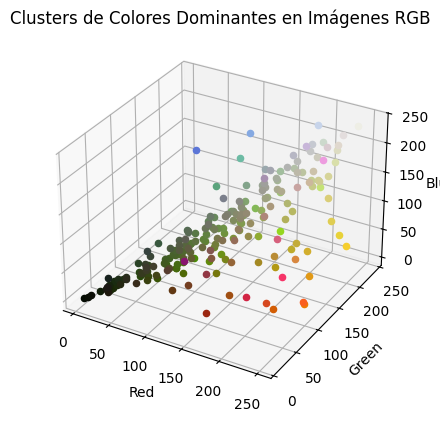

In [33]:
# Crear un gráfico de clusters para visualizar los colores RGB
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Agregar puntos al gráfico
for idx, row in df.iterrows():
    for i in range(1, 11):
        rgb_color = eval(row[f'RGB_{i}'])
        normalized_color = [c / 255.0 for c in rgb_color]  # Normalizar los valores RGB
        ax.scatter(rgb_color[0], rgb_color[1], rgb_color[2], color=normalized_color, label=f'Img {idx+1} Color {i}')

# Configurar etiquetas y título
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Clusters de Colores Dominantes en Imágenes RGB')

# Mostrar el gráfico
plt.show()